In [1]:
from astropy.io import votable
import matplotlib.pyplot as plt
import seaborn as sns


## Comparison plots of the effectiveness of different settings

In [2]:
src_table = votable.parse_single_table('trial_spectra.vot')

In [3]:
sns.set(style="whitegrid")
src_dataframe = src_table.to_table().to_pandas()

In [4]:
src_dataframe

,run,id,comp_name,ra,dec,rating,flux_peak,mean_cont,sd_cont,opacity_range,max_s_max_n,max_noise,num_chan_noise,uv_min,weighting,clean
0,1,89,J011408-732006,18.534144,-73.335061,A,20.402000,0.000063,0.067566,1.188884,4.932840,1.200390,82,1.6,natural,no clean
1,1,101,J010401-720206,16.004519,-72.035218,B,18.924000,0.000075,0.054044,0.492824,2.119750,1.157969,105,1.6,natural,no clean
2,1,345,J002121-710822,5.339977,-71.139720,B,117.855003,0.000182,0.119596,0.759007,1.572404,1.295057,64,1.6,natural,no clean
3,1,354,J003424-721144,8.601423,-72.195782,B,137.917007,0.000203,0.022992,0.219608,1.558373,1.085839,113,1.6,natural,no clean
4,1,357,J005218-722708,13.077894,-72.452300,B,153.179001,0.000216,0.017582,0.237652,2.693805,1.064338,118,1.6,natural,no clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,15,345,J002121-710822,5.339977,-71.139720,B,117.855003,0.000145,0.161218,1.297543,1.422695,1.535578,93,1.6,uniform,no clean
101,15,354,J003424-721144,8.601423,-72.195782,B,137.917007,0.000158,0.025238,0.219134,1.071060,1.105808,117,1.6,uniform,no clean
102,15,357,J005218-722708,13.077894,-72.452300,B,153.179001,0.000165,0.018043,0.250440,2.009551,1.083215,136,1.6,uniform,no clean
103,15,365,J002034-705526,5.144115,-70.924054,B,391.388000,0.000284,0.110830,0.759390,0.531088,1.495981,103,1.6,uniform,no clean


In [5]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
#plt.rc('xtick', labelsize='x-small')
#plt.rc('ytick', labelsize='x-small')

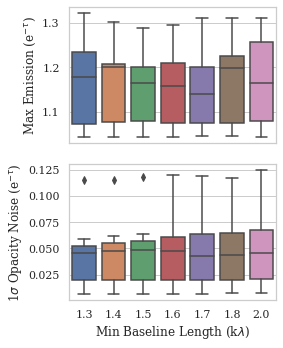

In [6]:

f, axs = plt.subplots(2,1,
                      figsize=(4,5),
                      sharex=True)

nat_subset = src_dataframe[(src_dataframe['weighting']=='natural')]
nat_subset = nat_subset[nat_subset['clean']=='no clean']
nat_subset.head()

ax = sns.boxplot(x="uv_min", y="max_noise", data=nat_subset, ax=axs[0])
#ax.set_title(r'Maximum emission in opacity')
ax.set_ylabel(r'Max Emission (e$^{-\tau}$)')
ax.set_xlabel('')


ax = sns.boxplot(x="uv_min", y="sd_cont", data=nat_subset, ax=axs[1])
#ax.set_title(r'Optical Depth Noise Level')
#ax.set_xlabel(r'Min Baseline Length (k$\lambda$)')
ax.set_ylabel(r'1$\sigma$ Opacity Noise (e$^{-\tau}$)')
ax.set_xlabel(r'Min Baseline Length (k$\lambda$)')



#ax = sns.boxplot(x="uv_min", y="num_chan_noise", data=nat_subset, ax=axs[2])
#ax.set_title('Number of channels of emission')
f.tight_layout()
f.savefig('figures/baseline_noise.pdf', bbox_inches='tight')

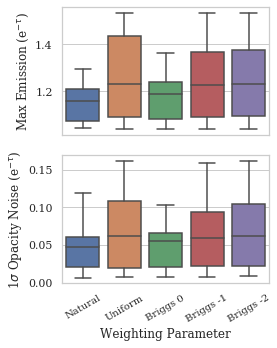

In [7]:
plt.rc('xtick', labelsize='small')


f, axs = plt.subplots(2,1,
                      figsize=(4,5),
                      sharex=True)

subset = src_dataframe[(src_dataframe['uv_min']==1.6)]
subset = subset[subset['clean']=='no clean']
subset.head()
ax = sns.boxplot(x="weighting", y="max_noise", data=subset, ax=axs[0])
ax.set_ylabel(r'Max Emission (e$^{-\tau}$)')
ax.set_xlabel('')

ax = sns.boxplot(x="weighting", y="sd_cont", data=subset, ax=axs[1])
ax.set_ylabel(r'1$\sigma$ Opacity Noise (e$^{-\tau}$)')
ax.set_xlabel('Weighting Parameter')
ax.set_xticklabels(
    labels=["Natural", 'Uniform', 'Briggs 0', 'Briggs -1', 'Briggs -2'], rotation=30)

#ax.set_title('Maximum emission in opacity')
f.tight_layout()
f.savefig('figures/weighting_noise.pdf', bbox_inches='tight')